In [2]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# <center>Jupyter Notebook Matery - Regular exam

# PART ONE - WORKING WITH DATA

You are provided with a dataset which contains different characteristics of the content found on Netflix. There are several goals that you should achieve: 

- explore the relative share of TV Shows/Movies on Netflix, 
- find out what are the top 10 providers (countries) of content on Netflix, 
- explore how content has been added over the years.

You will find cells named `TASK`. They define what task you should perform. Under each task you will find a cell, containing the comment _#YOUR CODE HERE_ in which you should write your solution.

You will encounter `HELPER CELLS` which you should just run.

**Good luck!** :)

## Reading the data

<b><font color='#8B0000'>TASK</font></b>

Read the dataset as a Pandas dataframe and show the **first three rows** of it.

Store the dataset in the variable `netflix_data`.

In [6]:
import pandas as pd

df = pd.read_csv('C:\\Users\\admin\\Desktop\\data\\netflix_titles.csv')
df.head(3)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


<b><font color='#8B0000'>TASK</font></b>

Present the number of rows and number of columns in the dataset in the following format:<br><br> "Number of rows: {rows}, number of columns: {columns}"

In [7]:

rows, columns = df.shape


output = f"Number of rows: {rows}, number of columns: {columns}"
output



'Number of rows: 7787, number of columns: 12'

## Find missing data

<b><font color='#8B0000'>TASK</font></b>

On separate lines, print the null rate of every column that contains null values in the following format: <br><br> 

"{column1} null rate: {null_rate1}" <br>
"{column2} null rate: {null_rate2}" <br>
...

In [9]:
import pandas as pd


null_rates = df.isnull().mean() * 100

null_rates = null_rates[null_rates > 0]


for column, null_rate in null_rates.items():
    print(f"{column} null rate: {null_rate:.2f}%")




director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


## Dealing with the missing data

<b><font color='#8B0000'>TASK</font></b>

Replace blank countries with the mode (most frequently ocurring) country.

In [10]:
country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)

<b><font color='#8B0000'>TASK</font></b>

Replace the missing values in the _director_ column with the string **'No Data'**.

In [11]:
df['director'] = df['director'].fillna('No Data')


<b><font color='#8B0000'>TASK</font></b>

Replace the missing values in the _cast_ column with the string **'No Data'**.

In [12]:
df['cast'] = df['cast'].fillna('No Data')


<b><font color='#8B0000'>TASK</font></b>

Drop all other columns with missing values.

In [13]:
df = df.dropna(axis=1)


<b><font color='#8B0000'>TASK</font></b>

Drop all the duplicates in the data.

In [14]:
df = df.drop_duplicates()


<b><font color='#8B0000'>TASK</font></b>

Drop the rows where country is a null value.

In [15]:
print(df.isnull().sum())
print("Number of duplicates:", df.duplicated().sum())


show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
duration        0
listed_in       0
description     0
dtype: int64
Number of duplicates: 0


<b><font color='#8B0000'>TASK</font></b>

Create a new column in the dataframe called 'first_country'. It should contain only the first country from the 'country' column (up to the first comma).

In [16]:
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])


<b><font color='#8B0000'>TASK</font></b>

Replace the name of the countries in the 'first_country' column as follows:

- United States --> USA

- United Kingdom --> UK

- South Korea --> S. Korea


In [17]:
df['first_country'] = df['first_country'].replace({
    'United States': 'USA',
    'United Kingdom': 'UK',
    'South Korea': 'S. Korea'
})



## Visualizations

<b><font color='#8B0000'>TASK</font></b>

Create a new dataframe, called **"mt_ratio"**. It should contain **1 row** and **2 columns**. 

The dataframe should contain the ratio of the different types of content to all available content on Netlix. 

For example, if 81% of the content on Netflix is represented by movies, you should have a column with the type Movie and 0.81 content ratio.

**Tip**: There is a column in the dataframe which designates the type of the content.

In [18]:
df[['country', 'first_country']].head()


,country,first_country
0,Brazil,Brazil
1,Mexico,Mexico
2,Singapore,Singapore
3,United States,USA
4,United States,USA


<b><font color='#8B0000'>TASK</font></b>

Create a **horizontal bar plot** which presents the relative share of the different types of content on Netflix (Movies and TV Series).

***REQUIREMENTS:***
- figure DPI should be **140**
 - figure size should be **(6.5, 2.5)**
 - use `#b20710` color for Movies, and `#221f1f` for TV Series
 - figure title should be **'Relative share of types of content on Netflix'**
 - create a figure **legend** in the **upper right** corner of the figure
 - no axis

In [20]:
type_counts = df['type'].value_counts(normalize=True)
mt_ratio = pd.DataFrame(type_counts).transpose()

In [22]:
mt_ratio.columns = ['Movie_ratio', 'TV_Show_ratio']

(0.0, 0.7250353152690381, -0.5, 0.5)

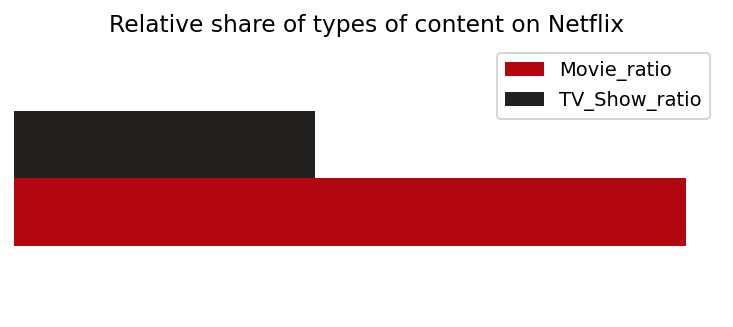

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6.5, 2.5), dpi=140)
mt_ratio.plot(kind='barh', color=['#b20710', '#221f1f'], legend=True, ax=plt.gca())
plt.title('Relative share of types of content on Netflix')
plt.legend(loc='upper right')
plt.axis('off')


In [ ]:
#HELPER CELL - RUN IT!
netflix_data['count'] = 1
print('Helper cell was run. Continue!')

In [26]:
plt.show()

<b><font color='#8B0000'>TASK</font></b>

Create a variable called **'top_10_countries'** which stores the top 10 countries by count of content they add.

In [27]:
top_10_countries = df['country'].value_counts().head(10)


<b><font color='#8B0000'>TASK</font></b>

Create a **vertical bar plot** which presents the top 10 countries by content.

***REQUIREMENTS:***


- figure size should be **(12, 5)**
- bar width must be **0.5**
- linewidth should be **0.6**,
- top 3 bars must be **colored** with `#b20710`,
- the other bars must be colored with `#f5f5f1`,
- y axis should be named **'Number of contributions'**
- figure title should be **'Top 10 contributors of content'**

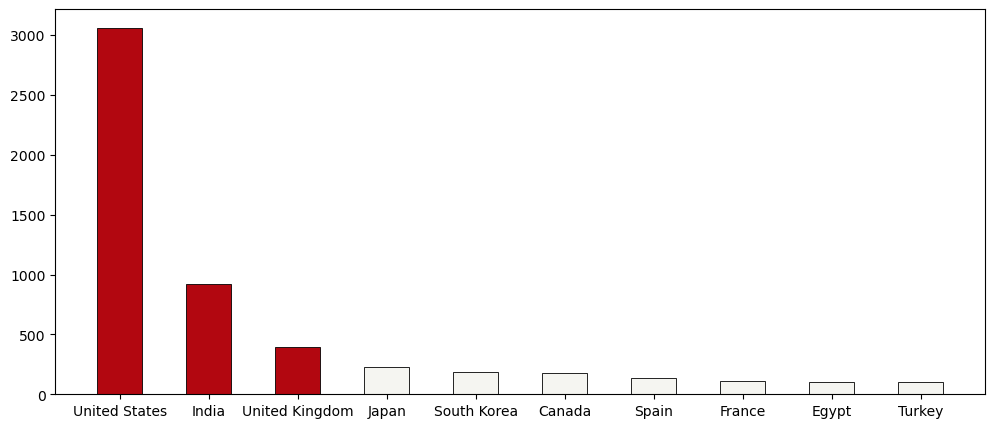

In [29]:

plt.figure(figsize=(12, 5))

colors = ['#b20710' if i < 3 else '#f5f5f1' for i in range(10)]
bars = plt.bar(top_10_countries.index, top_10_countries.values, color=colors, edgecolor='black', linewidth=0.6, width=0.5)

In [2]:
import pandas as pd


netflix_data = pd.read_csv('C:\\Users\\admin\\Desktop\\data\\netflix_titles.csv')


netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'], format="mixed")
netflix_data['year_added'] = netflix_data['date_added'].dt.year
print('Helper cell was run. Continue!')


Helper cell was run. Continue!


<b><font color='#8B0000'>TASK</font></b>

The helper cell above create new columns which you can use to create a line plot.

Create a **line plot** which presents the content added on Netflix throughout the years.

***REQUIREMENTS:***


- figure size should be **(12, 5)**
- Movie line should be **colored** with `#b20710`,
- TV Show line must be **colored** with `#221f1f"`,
- y axis should be named **'Number of contributions'**
- figure title should be **'Contributions throughout the years'**
- area below every line should be **filled** with the respective color



df = pd.read_csv('C:\\Users\\admin\\Desktop\\data\\netflix_titles.csv')

df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df['year_added'] = df['date_added'].dt.year

df = df.dropna(subset=['year_added'])


df['year_added'] = df['year_added'].astype(int)


yearly_content = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 5))

plt.plot(yearly_content.index, yearly_content['Movie'], label='Movies', color='#b20710', linewidth=2)
plt.fill_between(yearly_content.index, yearly_content['Movie'], color='#b20710', alpha=0.5)

plt.plot(yearly_content.index, yearly_content['TV Show'], label='TV Shows', color='#221f1f', linewidth=2)
plt.fill_between(yearly_content.index, yearly_content['TV Show'], color='#221f1f', alpha=0.5)


plt.ylabel('Number of contributions')
plt.title('Contributions throughout the years')
plt.legend()


plt.show()







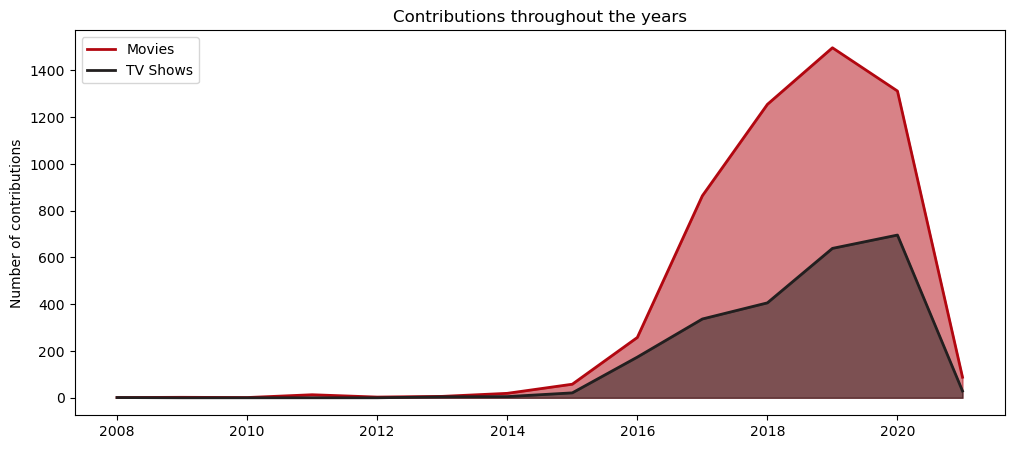

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\admin\\Desktop\\data\\netflix_titles.csv')


df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
df['year_added'] = df['date_added'].dt.year


df = df.dropna(subset=['year_added'])


df['year_added'] = df['year_added'].astype(int)

yearly_content = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 5))


plt.plot(yearly_content.index, yearly_content['Movie'], label='Movies', color='#b20710', linewidth=2)
plt.fill_between(yearly_content.index, yearly_content['Movie'], color='#b20710', alpha=0.5)

plt.plot(yearly_content.index, yearly_content['TV Show'], label='TV Shows', color='#221f1f', linewidth=2)
plt.fill_between(yearly_content.index, yearly_content['TV Show'], color='#221f1f', alpha=0.5)


plt.ylabel('Number of contributions')
plt.title('Contributions throughout the years')
plt.legend()

# PART TWO - WORKING WITH TEXT

Underneath you will find raw text which you should format according to the given final version of the text. Please, input your final, formatted text, in the last cell of the notebook denoted with the comment _#YOUR FINAL TEXT HERE_.

### Raw text

Netflix is an American subscription video on-demand streaming service owned and operated by Netflix, Inc. The service primarily distributes films and television series. It is available internationally in multiple languages. Netflix was launched on January 16, 2007, nearly a decade after Netflix, Inc. began its DVD-by-mail service. With 238.39 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service. By 2022, original productions accounted for half of Netflix's library in the United States, and the company had ventured into other categories, such as video game publishing via the Netflix service. More on Netflix game here (insert the following hyperlink https://help.netflix.com/en/node/121442).

### Final text - example

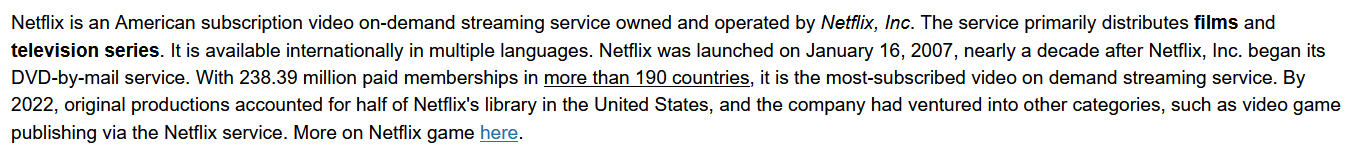

Netflix is an American subscription video on-demand streaming service owned and operated by *Netflix*, Inc. The service primarily distributes **films** and **television series**. It is available internationally in multiple languages. Netflix was launched on January 16, 2007, nearly a decade after Netflix, Inc. began its DVD-by-mail service. With 238.39 million paid memberships in <u>more than 190 countries</u>, it is the most-subscribed video on demand streaming service. By 2022, original productions accounted for half of Netflix's library in the United States, and the company had ventured into other categories, such as video game publishing via the Netflix service More on Netflix game [here](https://help.netflix.com/en/node/121442)